# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain Enhanced Points of Interest (DMTI)

---

This notebook describes _Step 1: Obtain_ of OSEMN methodology, the process of obtaining EPOI from DMTI.

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.
# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Step 1.1 Spatial join of EPOI from DMTI to parcel polygons

---


## Enhanced Points of Interest (DMTI)

[McGill library](https://www.mcgill.ca/library/find/maps/epoi):
The Enhanced Points of Interest files are produced by DMTI Spatial Inc. The Enhanced Points of Interest (EPOI) file is a national database of over 1 million Canadian business and recreational points of interest. Engineered using CanMap® Streetfiles, each EPOI has been accurately geocoded and precisely placed. This location enriched point of interest database allows users to see and analyze selected point of interest data in a given geographic area, enabling applications such as retail site analysis, competitive and market research, business and tourism analysis. Features Include: Coordinate location (X, Y), Standard industry classification code (SIC), Business or recreational names with address information, and Common Address Flags (CAF) allowing users to identify records with identical addresses. It is recommended to use this with the dataset with CanMap Streetfiles (DMTI).


## Import dependencies
## Import dependencies

In [1]:
import pandas as pd
import geopandas as gpd
import os
from time import time

In [2]:
data_path = '../../../data/'
epoi_path = data_path + 'dmti/epoi_gtha13/'
os.listdir(epoi_path)

['epoi_gtha13.sbx',
 'epoi_gtha13.sbn',
 'epoi_gtha13.dbf',
 'epoi_gtha13.shp.xml',
 'epoi_gtha13.cpg',
 'epoi_gtha13.shp',
 'epoi_gtha13.prj',
 'epoi_gtha13.shx']

In [3]:
lu_path = data_path + 'teranet/ParcelLandUse/lu_gtha_shapefile/'
os.listdir(lu_path)

['lu_gtha.dbf', 'lu_gtha.cpg', 'lu_gtha.shp', 'lu_gtha.prj', 'lu_gtha.shx']

## Load geometry of Enhanced Points of Interest (EPOI)

In [4]:
t = time()
epoi_gdf = gpd.read_file(epoi_path + 'epoi_gtha13.shp')
elapsed = time() - t
print("\n----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(epoi_gdf.shape[0], epoi_gdf.shape[1]) + 
      "\n-- Column names:\n", epoi_gdf.columns)


----- DataFrame loaded
in 39.04 seconds
with 317,874 rows
and 38 columns
-- Column names:
 Index(['OBJECTID', 'POI_ID', 'NAME', 'UNIT_SUITE', 'ADDRESS', 'DELIV_MODE',
       'CITY', 'MAF', 'PROV', 'POST_CODE', 'LOCATION', 'PHONE', 'FAX',
       'TOLL_FREE', 'WEBSITE', 'EPOI_TYPE', 'CAF', 'SIC_1', 'SIC_2', 'SIC_3',
       'SIC_4', 'SIC_5', 'SIC_6', 'NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4',
       'NAICS_5', 'SIC_MJ_GRP', 'SIC_DIV', 'X', 'Y', 'PREC_CODE', 'ATTRIBCODE',
       'STATUS', 'COMM_NAME', 'GRP_IND', 'geometry'],
      dtype='object')


In [5]:
epoi_gdf.plot();

## Load geometry of land use (PIN-indexed parcels)

----- GeoDataFrame loaded
in 156.57 seconds (2.61 minutes)
with 1,664,862 rows
and 18 columns
-- Column names:
 Index(['AreaM2', 'DEPTH', 'Distance', 'FID_1', 'FID_2', 'FRONTAGE', 'ID',
       'LANDUSE', 'LengthM', 'OBJECTID', 'PIN', 'PIN_1', 'PROP_CODE',
       'SHAPE_Area', 'SHAPE_Leng', 'SITE_AREA', 'municipali', 'geometry'],
      dtype='object')
Taking the subset with columns
: ['PIN', 'geometry']

-- New column names:
 Index(['PIN', 'geometry'], dtype='object')


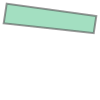

In [6]:
t = time()
lu_gdf = gpd.read_file(lu_path + 'lu_gtha.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gdf.shape[0], lu_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gdf.columns)

cols = ['PIN', 'geometry']

print("Taking the subset with columns\n:", cols)

lu_gdf = lu_gdf[cols]

print("\n-- New column names:\n", lu_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_gdf.iloc[0].geometry

## Perform the spatial join of Teranet points with DA polygons
### Validate projections

In [7]:
epoi_gdf.crs

{'init': 'epsg:4326'}

In [8]:
lu_gdf.crs

{'init': 'epsg:4326'}

### Perform the spatial joins
>Note: EPSG:4326 and WGS 84 represent the [same projection](https://spatialreference.org/ref/epsg/wgs-84/).

In [9]:
t = time()
epoi_pin_gdf = gpd.sjoin(epoi_gdf, lu_gdf, 
                         how='left', op='intersects')
elapsed = time() - t
print("\n----- Spatial join completed, new GeoDataFrame created"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(epoi_pin_gdf.shape[0], epoi_pin_gdf.shape[1]) + 
      "\n-- Column names:\n", epoi_pin_gdf.columns)


----- Spatial join completed, new GeoDataFrame created
in 236.24 seconds (3.94 minutes)
with 317,874 rows
and 40 columns
-- Column names:
 Index(['OBJECTID', 'POI_ID', 'NAME', 'UNIT_SUITE', 'ADDRESS', 'DELIV_MODE',
       'CITY', 'MAF', 'PROV', 'POST_CODE', 'LOCATION', 'PHONE', 'FAX',
       'TOLL_FREE', 'WEBSITE', 'EPOI_TYPE', 'CAF', 'SIC_1', 'SIC_2', 'SIC_3',
       'SIC_4', 'SIC_5', 'SIC_6', 'NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4',
       'NAICS_5', 'SIC_MJ_GRP', 'SIC_DIV', 'X', 'Y', 'PREC_CODE', 'ATTRIBCODE',
       'STATUS', 'COMM_NAME', 'GRP_IND', 'geometry', 'index_right', 'PIN'],
      dtype='object')


### Validate results

In [10]:
epoi_pin_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 317874 entries, 0 to 317873
Data columns (total 40 columns):
OBJECTID       317874 non-null int64
POI_ID         317874 non-null object
NAME           317864 non-null object
UNIT_SUITE     6175 non-null object
ADDRESS        290169 non-null object
DELIV_MODE     503 non-null object
CITY           317874 non-null object
MAF            317874 non-null object
PROV           317874 non-null object
POST_CODE      271121 non-null object
LOCATION       481 non-null object
PHONE          300494 non-null object
FAX            44820 non-null object
TOLL_FREE      20244 non-null object
WEBSITE        48127 non-null object
EPOI_TYPE      20470 non-null object
CAF            216613 non-null object
SIC_1          317874 non-null object
SIC_2          317874 non-null object
SIC_3          317874 non-null object
SIC_4          317874 non-null object
SIC_5          317874 non-null object
SIC_6          317874 non-null object
NAICS_1        31787

In [11]:
epoi_gdf.info(null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 317874 entries, 0 to 317873
Data columns (total 38 columns):
OBJECTID      317874 non-null int64
POI_ID        317874 non-null object
NAME          317864 non-null object
UNIT_SUITE    6175 non-null object
ADDRESS       290169 non-null object
DELIV_MODE    503 non-null object
CITY          317874 non-null object
MAF           317874 non-null object
PROV          317874 non-null object
POST_CODE     271121 non-null object
LOCATION      481 non-null object
PHONE         300494 non-null object
FAX           44820 non-null object
TOLL_FREE     20244 non-null object
WEBSITE       48127 non-null object
EPOI_TYPE     20470 non-null object
CAF           216613 non-null object
SIC_1         317874 non-null object
SIC_2         317874 non-null object
SIC_3         317874 non-null object
SIC_4         317874 non-null object
SIC_5         317874 non-null object
SIC_6         317874 non-null object
NAICS_1       317874 non-null object
NAICS_

In [12]:
epoi_pin_gdf['PIN'].value_counts()

212000009    14501
171710133     2179
163530162     1410
140680100     1338
030220360     1288
             ...  
104270400        1
074510109        1
102350403        1
102360329        1
064080155        1
Name: PIN, Length: 85476, dtype: int64

In [13]:
mask1 = epoi_pin_gdf['PIN'] == '212000009'
epoi_pin_gdf.loc[mask1, 'POI_ID'].value_counts()

POI5031318     1
POI4513873     1
POI5108943     1
POI3496592     1
POI10300056    1
              ..
POI4938869     1
POI10188529    1
POI4880025     1
POI4508025     1
POI10301860    1
Name: POI_ID, Length: 14501, dtype: int64

## Save results to a .csv file

In [14]:
epoi_pin_gdf.columns

Index(['OBJECTID', 'POI_ID', 'NAME', 'UNIT_SUITE', 'ADDRESS', 'DELIV_MODE',
       'CITY', 'MAF', 'PROV', 'POST_CODE', 'LOCATION', 'PHONE', 'FAX',
       'TOLL_FREE', 'WEBSITE', 'EPOI_TYPE', 'CAF', 'SIC_1', 'SIC_2', 'SIC_3',
       'SIC_4', 'SIC_5', 'SIC_6', 'NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4',
       'NAICS_5', 'SIC_MJ_GRP', 'SIC_DIV', 'X', 'Y', 'PREC_CODE', 'ATTRIBCODE',
       'STATUS', 'COMM_NAME', 'GRP_IND', 'geometry', 'index_right', 'PIN'],
      dtype='object')

In [17]:
save_path = epoi_path + '../dmti_epoi13_pin.csv'
t = time()
epoi_pin_gdf.drop('index_right', axis=1).to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../../data/dmti/epoi_gtha13/../dmti_epoi13_pin.csv 
took 21.66 seconds (0.36 minutes)
